# Basketball player statistics analysis (and prediction)

In this notebook, I explore my stats-RudyGobert.xlsx file. This file contains the main statistics of Rudy Gobert during his 10 seasons in the NBA. The final goal will be to obtain information on his progress, and build a model capable of predicting his next performances (points, rebounds, turnovers, etc.)

## **Data exportation** - Basketball Reference

In [264]:
import os
import pandas as pd

# Define the path to the data folder
data_folder = 'data'

# List all CSV files in the data folder
csv_files = [f for f in os.listdir(data_folder) if f.startswith('stats')]

# Read and concatenate all CSV files
dataframes = [pd.read_csv(os.path.join(data_folder, file)) for file in csv_files]
stats_dataframe = pd.concat(dataframes, ignore_index=True)

stats_dataframe

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2020-12-23,28-180,UTA,@,POR,W (+20),1,28:08:00,8.0,10.0,0.800,0.0,0.0,NaN,4.0,6.0,0.667,4.0,13.0,17.0,2.0,1.0,0.0,2.0,2.0,20.0,21.7,15.0
1,2,2.0,2020-12-26,28-183,UTA,NaN,MIN,L (-5),1,29:03:00,7.0,10.0,0.700,0.0,0.0,NaN,4.0,6.0,0.667,7.0,9.0,16.0,2.0,0.0,1.0,4.0,4.0,18.0,17.1,7.0
2,3,3.0,2020-12-28,28-185,UTA,@,OKC,W (+1),1,36:49:00,6.0,8.0,0.750,0.0,0.0,NaN,0.0,0.0,NaN,0.0,10.0,10.0,4.0,1.0,4.0,1.0,1.0,12.0,17.0,5.0
3,4,4.0,2020-12-31,28-188,UTA,NaN,PHO,L (-11),1,34:11:00,7.0,9.0,0.778,0.0,0.0,NaN,4.0,8.0,0.500,2.0,12.0,14.0,0.0,1.0,1.0,1.0,3.0,18.0,17.4,-9.0
4,5,5.0,2021-01-01,28-189,UTA,NaN,LAC,W (+6),1,24:28:00,5.0,10.0,0.500,0.0,0.0,NaN,2.0,4.0,0.500,2.0,7.0,9.0,1.0,1.0,1.0,0.0,4.0,12.0,10.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,38,38.0,2025-01-11,32-199,MIN,NaN,MEM,L (-2),1,28:40:00,6.0,6.0,1.000,0.0,0.0,NaN,0.0,2.0,0.000,2.0,2.0,4.0,4.0,0.0,1.0,0.0,3.0,12.0,13.7,3.0
920,39,39.0,2025-01-13,32-201,MIN,@,WAS,W (+14),1,32:34:00,5.0,6.0,0.833,0.0,0.0,NaN,1.0,2.0,0.500,5.0,6.0,11.0,2.0,1.0,1.0,0.0,1.0,11.0,16.4,11.0
921,40,40.0,2025-01-15,32-203,MIN,NaN,GSW,L (-1),1,29:29:00,2.0,2.0,1.000,0.0,0.0,NaN,3.0,5.0,0.600,2.0,8.0,10.0,1.0,0.0,2.0,1.0,2.0,7.0,9.7,-4.0
922,41,41.0,2025-01-17,32-205,MIN,@,NYK,W (+17),1,34:26:00,5.0,6.0,0.833,0.0,0.0,NaN,1.0,2.0,0.500,1.0,5.0,6.0,1.0,0.0,2.0,1.0,2.0,11.0,10.9,9.0


In [265]:
print(stats_dataframe.shape)
stats_dataframe.rename(columns={'Unnamed: 5': 'LOC', 'Unnamed: 7':'RES'}, inplace=True)
print(stats_dataframe.columns)

(924, 30)
Index(['Rk', 'G', 'Date', 'Age', 'Tm', 'LOC', 'Opp', 'RES', 'GS', 'MP', 'FG',
       'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-'],
      dtype='object')


## **Data preprocessing**

### Missing values

In [266]:
# Get the number of missing values in the dataframe per column
nan_counts = stats_dataframe.isna().sum().sort_values(ascending=False)

print(nan_counts)

3P%     908
LOC     460
FT%     210
FG%     142
+/-     126
FTA     125
STL     125
TRB     125
DRB     125
ORB     125
BLK     125
TOV     125
FT      125
G       125
3PA     125
3P      125
PF      125
FGA     125
FG      125
MP      125
PTS     125
GmSc    125
AST     125
Tm        0
Date      0
Opp       0
Age       0
GS        0
RES       0
Rk        0
dtype: int64


In [267]:
# Treat the missing values in the LOC column

# Replace "@" with "away"
stats_dataframe['LOC'] = stats_dataframe['LOC'].replace('@', 'away')
# Replace NaN values with "home"
stats_dataframe['LOC'] = stats_dataframe['LOC'].fillna('home')

In [268]:
# Treat the missing values in all the game stats columns for when he didn't play

# Define the conditions
conditions = ['Inactive', 'Did Not Play', 'Did Not Dress', 'Not With Team']

# Replace NaN values with -1 for rows where GS matches the conditions
stats_dataframe.loc[stats_dataframe['GS'].isin(conditions)] = stats_dataframe.loc[stats_dataframe['GS'].isin(conditions)].infer_objects(copy=False).fillna(-1)

In [269]:
# Treat the missing values in the 3P% column. In this cases, the player did play, but didn't attempt any 3-point shots, free throws or field goals.

stats_dataframe['3P%'] = stats_dataframe['3P%'].fillna(0)
stats_dataframe['FT%'] = stats_dataframe['FT%'].fillna(0)
stats_dataframe['FG%'] = stats_dataframe['FG%'].fillna(0)

# Treat the missing value in the +/- column, which was maybe a mistake or an error.
stats_dataframe['+/-'] = stats_dataframe['+/-'].fillna('4')


In [270]:
print(stats_dataframe.isna().sum().sort_values(ascending=False))

Rk      0
G       0
GmSc    0
PTS     0
PF      0
TOV     0
BLK     0
STL     0
AST     0
TRB     0
DRB     0
ORB     0
FT%     0
FTA     0
FT      0
3P%     0
3PA     0
3P      0
FG%     0
FGA     0
FG      0
MP      0
GS      0
RES     0
Opp     0
LOC     0
Tm      0
Age     0
Date    0
+/-     0
dtype: int64


### Other preprocessing

In [271]:
# Age column (from 31-128 to 31)
# Remove everything after the hyphen and convert the column to int
stats_dataframe['Age'] = stats_dataframe['Age'].apply(lambda x: int(x.split('-')[0]))
stats_dataframe.Age


0      28
1      28
2      28
3      28
4      28
       ..
919    32
920    32
921    32
922    32
923    32
Name: Age, Length: 924, dtype: int64

In [272]:
# RES column (from W (+2) to 2)
import re

# Extract the number in parentheses in the colonne RES
stats_dataframe['RES'] = stats_dataframe['RES'].str.extract(r'\(([-+]?\d+)\)').astype(int)
stats_dataframe.RES

0      20
1      -5
2       1
3     -11
4       6
       ..
919    -2
920    14
921    -1
922    17
923    -7
Name: RES, Length: 924, dtype: int64

In [273]:
stats_dataframe

,Rk,G,Date,Age,Tm,LOC,Opp,RES,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2020-12-23,28,UTA,away,POR,20,1,28:08:00,8.0,10.0,0.800,0.0,0.0,0.0,4.0,6.0,0.667,4.0,13.0,17.0,2.0,1.0,0.0,2.0,2.0,20.0,21.7,15.0
1,2,2.0,2020-12-26,28,UTA,home,MIN,-5,1,29:03:00,7.0,10.0,0.700,0.0,0.0,0.0,4.0,6.0,0.667,7.0,9.0,16.0,2.0,0.0,1.0,4.0,4.0,18.0,17.1,7.0
2,3,3.0,2020-12-28,28,UTA,away,OKC,1,1,36:49:00,6.0,8.0,0.750,0.0,0.0,0.0,0.0,0.0,0.000,0.0,10.0,10.0,4.0,1.0,4.0,1.0,1.0,12.0,17.0,5.0
3,4,4.0,2020-12-31,28,UTA,home,PHO,-11,1,34:11:00,7.0,9.0,0.778,0.0,0.0,0.0,4.0,8.0,0.500,2.0,12.0,14.0,0.0,1.0,1.0,1.0,3.0,18.0,17.4,-9.0
4,5,5.0,2021-01-01,28,UTA,home,LAC,6,1,24:28:00,5.0,10.0,0.500,0.0,0.0,0.0,2.0,4.0,0.500,2.0,7.0,9.0,1.0,1.0,1.0,0.0,4.0,12.0,10.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,38,38.0,2025-01-11,32,MIN,home,MEM,-2,1,28:40:00,6.0,6.0,1.000,0.0,0.0,0.0,0.0,2.0,0.000,2.0,2.0,4.0,4.0,0.0,1.0,0.0,3.0,12.0,13.7,3.0
920,39,39.0,2025-01-13,32,MIN,away,WAS,14,1,32:34:00,5.0,6.0,0.833,0.0,0.0,0.0,1.0,2.0,0.500,5.0,6.0,11.0,2.0,1.0,1.0,0.0,1.0,11.0,16.4,11.0
921,40,40.0,2025-01-15,32,MIN,home,GSW,-1,1,29:29:00,2.0,2.0,1.000,0.0,0.0,0.0,3.0,5.0,0.600,2.0,8.0,10.0,1.0,0.0,2.0,1.0,2.0,7.0,9.7,-4.0
922,41,41.0,2025-01-17,32,MIN,away,NYK,17,1,34:26:00,5.0,6.0,0.833,0.0,0.0,0.0,1.0,2.0,0.500,1.0,5.0,6.0,1.0,0.0,2.0,1.0,2.0,11.0,10.9,9.0


In [274]:
def convert_to_minutes_seconds(mp):
    if isinstance(mp, str):
        parts = mp.split(':')
        return int(parts[0]) * 60 + int(parts[1])
    return mp

stats_dataframe['MP'] = stats_dataframe['MP'].apply(convert_to_minutes_seconds)
stats_dataframe['MP']

0      1688.0
1      1743.0
2      2209.0
3      2051.0
4      1468.0
        ...  
919    1720.0
920    1954.0
921    1769.0
922    2066.0
923    1878.0
Name: MP, Length: 924, dtype: float64

In [275]:
stats_dataframe.head(10)

,Rk,G,Date,Age,Tm,LOC,Opp,RES,GS,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2020-12-23,28,UTA,away,POR,20,1,1688.0,8.0,10.0,0.800,0.0,0.0,0.0,4.0,6.0,0.667,4.0,13.0,17.0,2.0,1.0,0.0,2.0,2.0,20.0,21.7,15.0
1,2,2.0,2020-12-26,28,UTA,home,MIN,-5,1,1743.0,7.0,10.0,0.700,0.0,0.0,0.0,4.0,6.0,0.667,7.0,9.0,16.0,2.0,0.0,1.0,4.0,4.0,18.0,17.1,7.0
2,3,3.0,2020-12-28,28,UTA,away,OKC,1,1,2209.0,6.0,8.0,0.750,0.0,0.0,0.0,0.0,0.0,0.000,0.0,10.0,10.0,4.0,1.0,4.0,1.0,1.0,12.0,17.0,5.0
3,4,4.0,2020-12-31,28,UTA,home,PHO,-11,1,2051.0,7.0,9.0,0.778,0.0,0.0,0.0,4.0,8.0,0.500,2.0,12.0,14.0,0.0,1.0,1.0,1.0,3.0,18.0,17.4,-9.0
4,5,5.0,2021-01-01,28,UTA,home,LAC,6,1,1468.0,5.0,10.0,0.500,0.0,0.0,0.0,2.0,4.0,0.500,2.0,7.0,9.0,1.0,1.0,1.0,0.0,4.0,12.0,10.5,0.0
5,6,6.0,2021-01-03,28,UTA,away,SAS,21,1,1647.0,2.0,7.0,0.286,0.0,0.0,0.0,3.0,6.0,0.500,2.0,14.0,16.0,1.0,0.0,6.0,4.0,1.0,7.0,7.8,18.0
6,7,7.0,2021-01-05,28,UTA,away,BRK,-34,1,1630.0,3.0,10.0,0.300,0.0,0.0,0.0,4.0,5.0,0.800,6.0,5.0,11.0,3.0,0.0,2.0,0.0,1.0,10.0,12.6,-15.0
7,8,8.0,2021-01-06,28,UTA,away,NYK,-12,1,2100.0,7.0,9.0,0.778,0.0,0.0,0.0,0.0,3.0,0.000,2.0,9.0,11.0,2.0,0.0,5.0,0.0,1.0,14.0,17.9,-18.0
8,9,9.0,2021-01-08,28,UTA,away,MIL,13,1,1986.0,4.0,9.0,0.444,0.0,0.0,0.0,1.0,4.0,0.250,4.0,10.0,14.0,0.0,1.0,4.0,2.0,1.0,9.0,10.3,13.0
9,10,10.0,2021-01-10,28,UTA,away,DET,10,1,2014.0,1.0,5.0,0.200,0.0,0.0,0.0,2.0,6.0,0.333,6.0,13.0,19.0,1.0,0.0,4.0,4.0,2.0,4.0,6.1,7.0


Perfect! Now we don't have any missing values anymore. We preprocessed all our data. We can move on to the exploration phase.

In [249]:
stats_dataframe.to_csv('data/Rudy_Gobert_entire_stats.csv', index=False)

### **Date exploration**

In [20]:
import pandas as pd
stats_dataframe = pd.read_csv('data/Rudy_Gobert_entire_stats.csv')
stats_dataframe.head()

,Rk,G,Date,Age,Tm,LOC,Opp,RES,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2020-12-23,28,UTA,away,POR,20,1,1688.0,...,13.0,17.0,2.0,1.0,0.0,2.0,2.0,20.0,21.7,15.0
1,2,2.0,2020-12-26,28,UTA,home,MIN,-5,1,1743.0,...,9.0,16.0,2.0,0.0,1.0,4.0,4.0,18.0,17.1,7.0
2,3,3.0,2020-12-28,28,UTA,away,OKC,1,1,2209.0,...,10.0,10.0,4.0,1.0,4.0,1.0,1.0,12.0,17.0,5.0
3,4,4.0,2020-12-31,28,UTA,home,PHO,-11,1,2051.0,...,12.0,14.0,0.0,1.0,1.0,1.0,3.0,18.0,17.4,-9.0
4,5,5.0,2021-01-01,28,UTA,home,LAC,6,1,1468.0,...,7.0,9.0,1.0,1.0,1.0,0.0,4.0,12.0,10.5,0.0


### Encoding

In [21]:
# Convert the Date colum to numerical values

# First convert the Date column to datetime objects
stats_dataframe['Date'] = pd.to_datetime(stats_dataframe['Date'])
# Then convert the datetime objects to timestamps (seconds since epoch)
stats_dataframe['Date'] = stats_dataframe['Date'].astype('int64') // 10**9

In [23]:
# Replace the 1 and 0 with yes and no
stats_dataframe['GS'] = stats_dataframe['GS'].replace({'1': 'YES', '0': 'NO'})

### One-Hot encoding

In [ ]:
# Encode categorical columns
categorical_columns = ['Tm', 'LOC', 'Opp', 'GS']

# Use pd.get_dummies to convert categorical columns to dummy variables
encoded_dataframe = pd.get_dummies(stats_dataframe, columns=categorical_columns)

encoded_dataframe.head()

,Rk,G,Date,Age,Opp,RES,MP,FG,FGA,FG%,...,Tm_MIN,Tm_UTA,LOC_away,LOC_home,GS_Did Not Dress,GS_Did Not Play,GS_Inactive,GS_NO,GS_Not With Team,GS_YES
0,1,1.0,1608681600,28,POR,20,1688.0,8.0,10.0,0.800,...,False,True,True,False,False,False,False,False,False,True
1,2,2.0,1608940800,28,MIN,-5,1743.0,7.0,10.0,0.700,...,False,True,False,True,False,False,False,False,False,True
2,3,3.0,1609113600,28,OKC,1,2209.0,6.0,8.0,0.750,...,False,True,True,False,False,False,False,False,False,True
3,4,4.0,1609372800,28,PHO,-11,2051.0,7.0,9.0,0.778,...,False,True,False,True,False,False,False,False,False,True
4,5,5.0,1609459200,28,LAC,6,1468.0,5.0,10.0,0.500,...,False,True,False,True,False,False,False,False,False,True


In [282]:
# Calculate the correlation matrix
correlation_matrix = encoded_dataframe.corr()

# Display the correlation matrix
correlation_matrix

,Rk,G,Date,Age,RES,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,...,Opp_IND,Opp_LAC,Opp_LAL,Opp_MEM,Opp_MIA,Opp_MIL,Opp_MIN,Opp_NOP,Opp_NYK,Opp_OKC,Opp_ORL,Opp_PHI,Opp_PHO,Opp_POR,Opp_SAC,Opp_SAS,Opp_TOR,Opp_UTA,Opp_WAS,GS_0,GS_1,GS_Did Not Dress,GS_Did Not Play,GS_Inactive,GS_Not With Team
Rk,1.000000,0.762772,-0.038418,-0.076341,0.060682,0.049058,0.075409,0.068342,0.026751,0.017073,0.012548,0.017073,0.050090,0.062457,0.010734,0.056531,0.030386,0.044651,0.074065,0.011871,0.028382,0.005664,0.006623,0.079465,0.082528,...,-0.045444,0.004010,0.059155,0.007212,-0.106254,-0.004536,0.036194,-0.008340,0.002200,-0.052124,-0.040829,-0.080247,0.043830,0.048323,0.002423,0.006871,-0.049300,-0.015319,0.070304,-0.084355,0.073359,-0.030932,0.045571,-0.036067,-0.026629
G,0.762772,1.000000,0.099966,0.069214,0.137969,0.522084,0.457953,0.464191,0.526365,0.532380,0.494955,0.532380,0.347494,0.367573,0.490071,0.413542,0.431125,0.464247,0.387823,0.326800,0.365274,0.327692,0.388172,0.458718,0.464823,...,-0.033897,0.010004,0.024833,0.002653,-0.088128,-0.002928,0.037375,-0.016412,-0.001725,-0.039710,-0.048221,-0.063026,0.040155,0.075741,0.021655,-0.009972,-0.035230,-0.079366,0.069700,-0.080847,0.486652,-0.205261,-0.274903,-0.373309,-0.044304
Date,-0.038418,0.099966,1.000000,0.999043,0.157786,0.335494,0.335335,0.318931,0.223670,0.166026,0.178951,0.166026,0.204832,0.198974,0.220751,0.190208,0.319525,0.310813,0.158267,0.120491,0.062550,0.140759,0.224844,0.338244,0.312015,...,-0.013075,0.010090,0.007676,0.001256,-0.003486,-0.011431,-0.079432,-0.005590,0.012731,-0.013031,-0.000874,-0.014500,-0.008668,0.007844,0.014047,0.011461,0.010471,0.117455,0.003836,-0.467200,0.463960,-0.043321,-0.243726,-0.005684,-0.032828
Age,-0.076341,0.069214,0.999043,1.000000,0.152891,0.331469,0.330207,0.314222,0.220100,0.162896,0.175723,0.162896,0.202178,0.195391,0.218133,0.186276,0.315129,0.306065,0.154305,0.119140,0.058573,0.139111,0.223989,0.333305,0.306554,...,-0.011560,0.009557,0.005930,0.001650,0.000568,-0.011560,-0.081138,-0.004676,0.012193,-0.010242,0.000568,-0.011560,-0.010737,0.005680,0.013745,0.012676,0.012193,0.118141,0.000568,-0.463154,0.458577,-0.041521,-0.244928,-0.001785,-0.031801
RES,0.060682,0.137969,0.157786,0.152891,1.000000,0.166272,0.249753,0.211297,0.167058,0.112225,0.111395,0.112225,0.171506,0.169150,0.146882,0.107913,0.250196,0.228173,0.158875,0.060853,0.233535,0.094290,0.102166,0.260082,0.281571,...,-0.036575,0.002541,0.030826,-0.007724,0.000196,-0.005744,-0.005532,0.011706,0.012927,-0.069997,0.065804,0.015788,0.015504,0.010632,0.079014,-0.038828,-0.079949,0.058938,0.023183,-0.225843,0.250071,-0.092057,-0.032161,-0.069300,-0.015548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GS_1,0.073359,0.486652,0.463960,0.458577,0.250071,0.869101,0.688833,0.722050,0.722719,0.713940,0.661072,0.713940,0.554697,0.574172,0.721820,0.571968,0.725874,0.742674,0.525130,0.493535,0.512853,0.550057,0.613997,0.710085,0.692565,...,-0.013955,-0.007603,0.020194,0.030032,-0.009808,0.002791,-0.000205,-0.007603,-0.021888,-0.023047,-0.042582,0.002791,0.002020,0.042323,0.020194,-0.010927,-0.005837,-0.030898,0.039354,-0.600222,1.000000,-0.275262,-0.368654,-0.500620,-0.059413
GS_Did Not Dress,-0.030932,-0.205261,-0.043321,-0.041521,-0.092057,-0.314514,-0.247262,-0.260562,-0.359450,-0.385553,-0.357158,-0.385553,-0.202463,-0.208026,-0.339973,-0.234753,-0.259554,-0.270299,-0.218260,-0.226227,-0.227827,-0.229407,-0.264797,-0.244058,-0.241585,...,0.071449,-0.032439,-0.032861,-0.032439,0.022246,-0.023816,-0.029806,-0.032439,0.020752,0.035258,0.068858,-0.023816,-0.032013,-0.034505,0.002404,0.000784,-0.024903,0.064132,-0.024365,-0.050711,-0.275262,1.000000,-0.031146,-0.042295,-0.005020
GS_Did Not Play,0.045571,-0.274903,-0.243726,-0.244928,-0.032161,-0.421224,-0.331154,-0.348966,-0.481407,-0.516366,-0.47833

Matplotlib is building the font cache; this may take a moment.


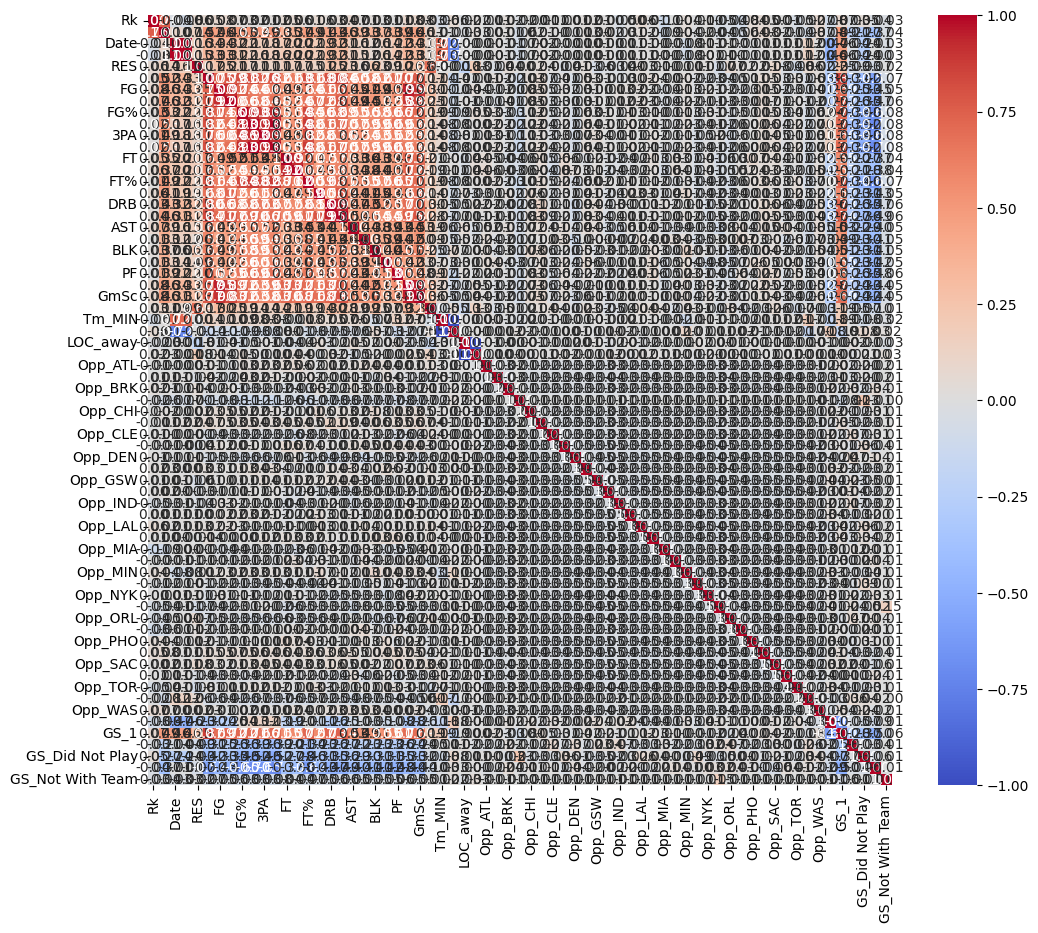

In [284]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()

### Label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le label encoder
label_encoder = LabelEncoder()

encoded_dataframe = stats_dataframe.copy()

# Appliquer le label encoding
encoded_dataframe['Tm'] = label_encoder.fit_transform(encoded_dataframe['Tm'])
encoded_dataframe['LOC'] = label_encoder.fit_transform(encoded_dataframe['LOC'])
encoded_dataframe['Opp'] = label_encoder.fit_transform(encoded_dataframe['Opp'])
encoded_dataframe['GS'] = label_encoder.fit_transform(encoded_dataframe['GS'])

print("\nDataset avec Label Encoding :")
encoded_dataframe.head()



Dataset avec Label Encoding :


,Rk,G,Date,Age,Tm,LOC,Opp,RES,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,1608681600,28,1,0,25,20,1,1688.0,...,13.0,17.0,2.0,1.0,0.0,2.0,2.0,20.0,21.7,15.0
1,2,2.0,1608940800,28,1,1,18,-5,1,1743.0,...,9.0,16.0,2.0,0.0,1.0,4.0,4.0,18.0,17.1,7.0
2,3,3.0,1609113600,28,1,0,21,1,1,2209.0,...,10.0,10.0,4.0,1.0,4.0,1.0,1.0,12.0,17.0,5.0
3,4,4.0,1609372800,28,1,1,24,-11,1,2051.0,...,12.0,14.0,0.0,1.0,1.0,1.0,3.0,18.0,17.4,-9.0
4,5,5.0,1609459200,28,1,1,13,6,1,1468.0,...,7.0,9.0,1.0,1.0,1.0,0.0,4.0,12.0,10.5,0.0


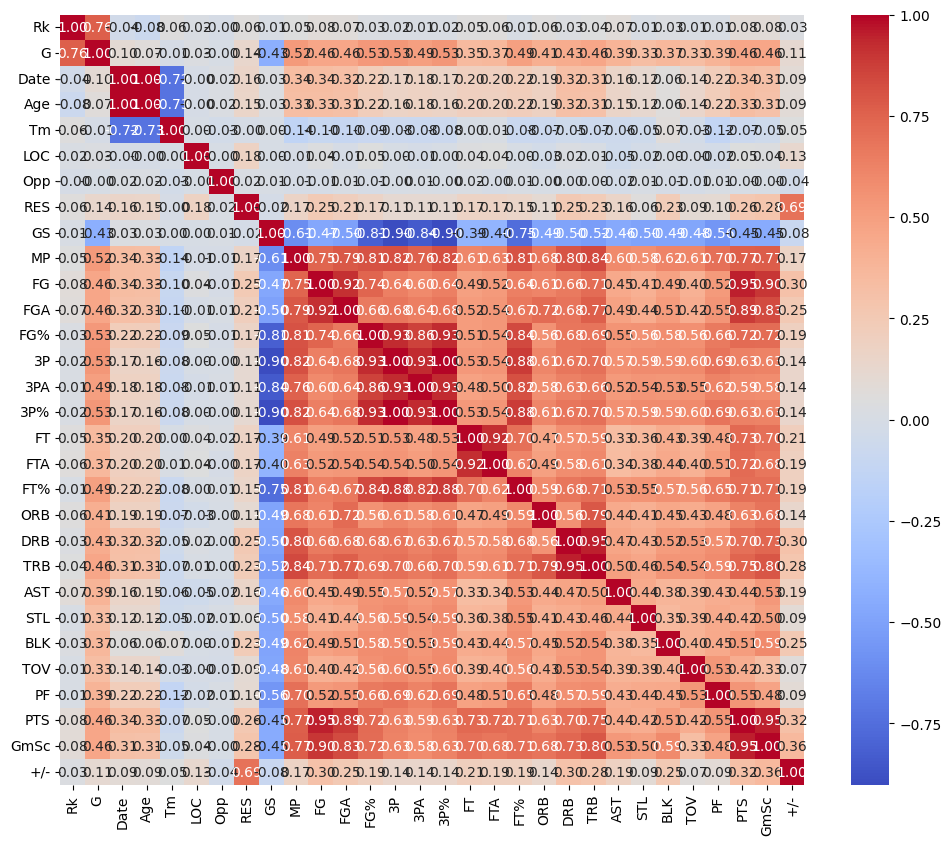

In [10]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = encoded_dataframe.corr()

# Plot the correlation matrix
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()

### MIX one hot et label encoding

In [27]:
# Encode categorical columns
categorical_columns = ['Tm', 'LOC', 'GS']
# Use pd.get_dummies to convert categorical columns to dummy variables
encoded_dataframe = pd.get_dummies(stats_dataframe, columns=categorical_columns)
encoded_dataframe.head()

,Rk,G,Date,Age,Opp,RES,MP,FG,FGA,FG%,...,Tm_MIN,Tm_UTA,LOC_away,LOC_home,GS_Did Not Dress,GS_Did Not Play,GS_Inactive,GS_NO,GS_Not With Team,GS_YES
0,1,1.0,1608681600,28,POR,20,1688.0,8.0,10.0,0.800,...,False,True,True,False,False,False,False,False,False,True
1,2,2.0,1608940800,28,MIN,-5,1743.0,7.0,10.0,0.700,...,False,True,False,True,False,False,False,False,False,True
2,3,3.0,1609113600,28,OKC,1,2209.0,6.0,8.0,0.750,...,False,True,True,False,False,False,False,False,False,True
3,4,4.0,1609372800,28,PHO,-11,2051.0,7.0,9.0,0.778,...,False,True,False,True,False,False,False,False,False,True
4,5,5.0,1609459200,28,LAC,6,1468.0,5.0,10.0,0.500,...,False,True,False,True,False,False,False,False,False,True


In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialiser le label encoder
label_encoder = LabelEncoder()

# Appliquer le label encoding
encoded_dataframe['Opp'] = label_encoder.fit_transform(encoded_dataframe['Opp'])

print("\nDataset avec Label Encoding :")
encoded_dataframe.head()



Dataset avec Label Encoding :


,Rk,G,Date,Age,Opp,RES,MP,FG,FGA,FG%,...,Tm_MIN,Tm_UTA,LOC_away,LOC_home,GS_Did Not Dress,GS_Did Not Play,GS_Inactive,GS_NO,GS_Not With Team,GS_YES
0,1,1.0,1608681600,28,25,20,1688.0,8.0,10.0,0.800,...,False,True,True,False,False,False,False,False,False,True
1,2,2.0,1608940800,28,18,-5,1743.0,7.0,10.0,0.700,...,False,True,False,True,False,False,False,False,False,True
2,3,3.0,1609113600,28,21,1,2209.0,6.0,8.0,0.750,...,False,True,True,False,False,False,False,False,False,True
3,4,4.0,1609372800,28,24,-11,2051.0,7.0,9.0,0.778,...,False,True,False,True,False,False,False,False,False,True
4,5,5.0,1609459200,28,13,6,1468.0,5.0,10.0,0.500,...,False,True,False,True,False,False,False,False,False,True


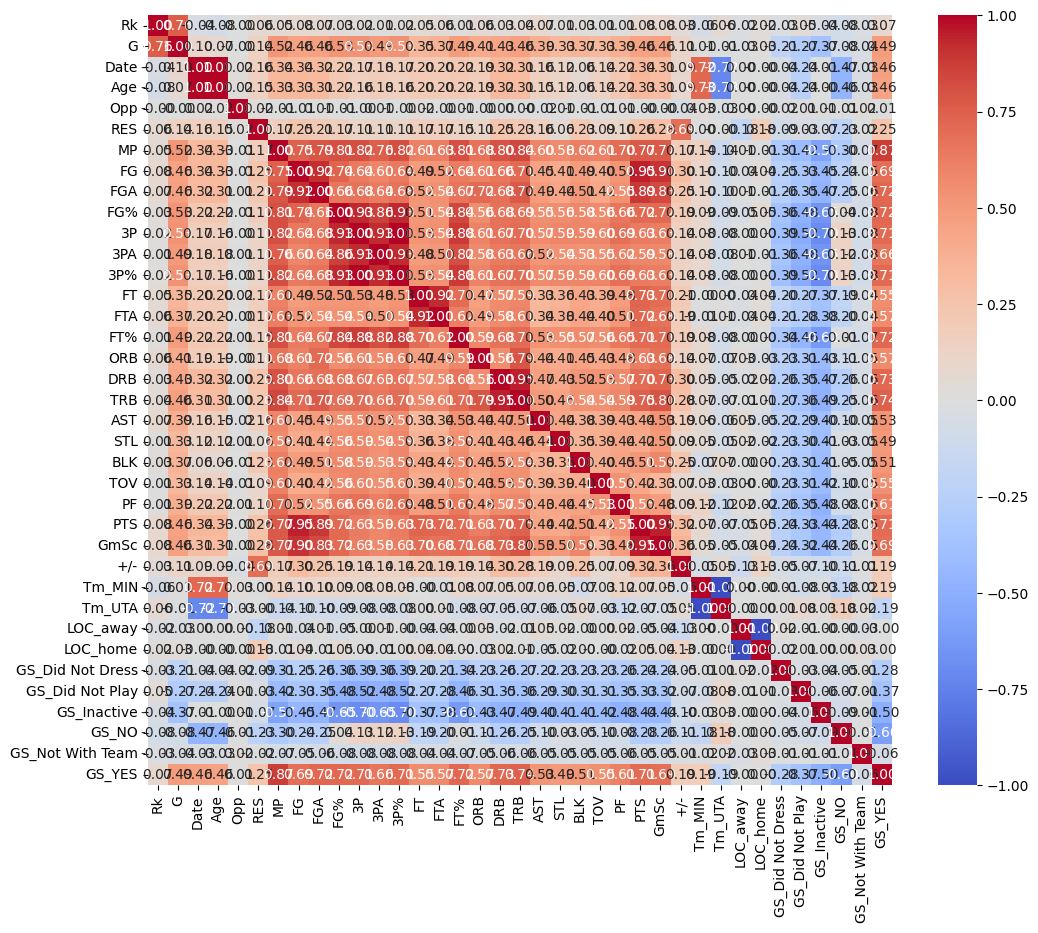

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = encoded_dataframe.corr()

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Display the plot
plt.show()